In [1]:
# Importing the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 
sns.set()

In [2]:
# importing the dataset 
dataset = pd.read_csv('abalone.data', header = None)
dataset.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
# Seprating the dataset in independent and dependent variable.
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

In [3]:
# Dimention of the data
print(dataset.shape)
print(X.shape)
print(y.shape)

(4177, 9)
(4177, 8)
(4177,)


In [4]:
# a look on the data
dataset.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [5]:
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Data Visualization

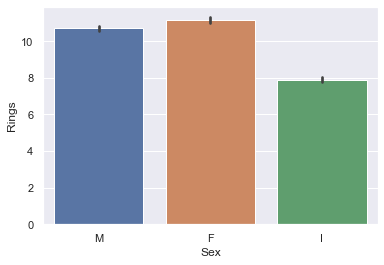

In [6]:
sns.barplot(x = "Sex", y = "Rings", data = dataset)

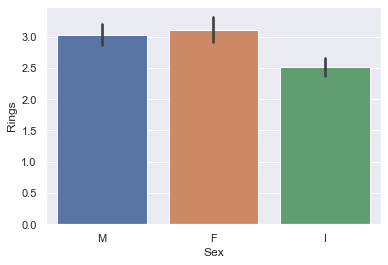

In [7]:
sns.barplot(x = "Sex", y = "Rings", data = dataset, estimator= np.std)

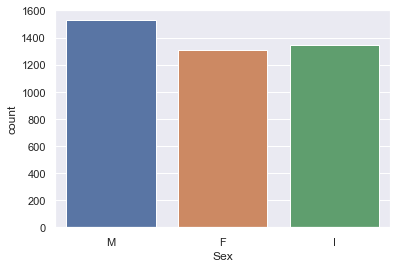

In [8]:
sns.countplot(x="Sex", data = dataset)

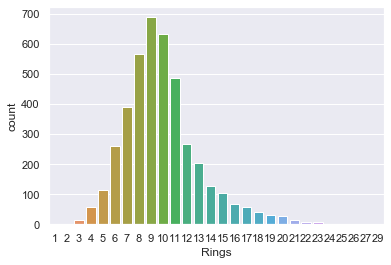

In [9]:
sns.countplot(x= "Rings", data = dataset)

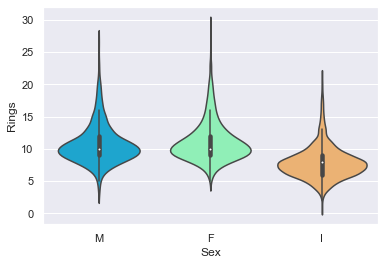

In [10]:
sns.violinplot(x= "Sex", y= "Rings", data = dataset, palette = "rainbow")

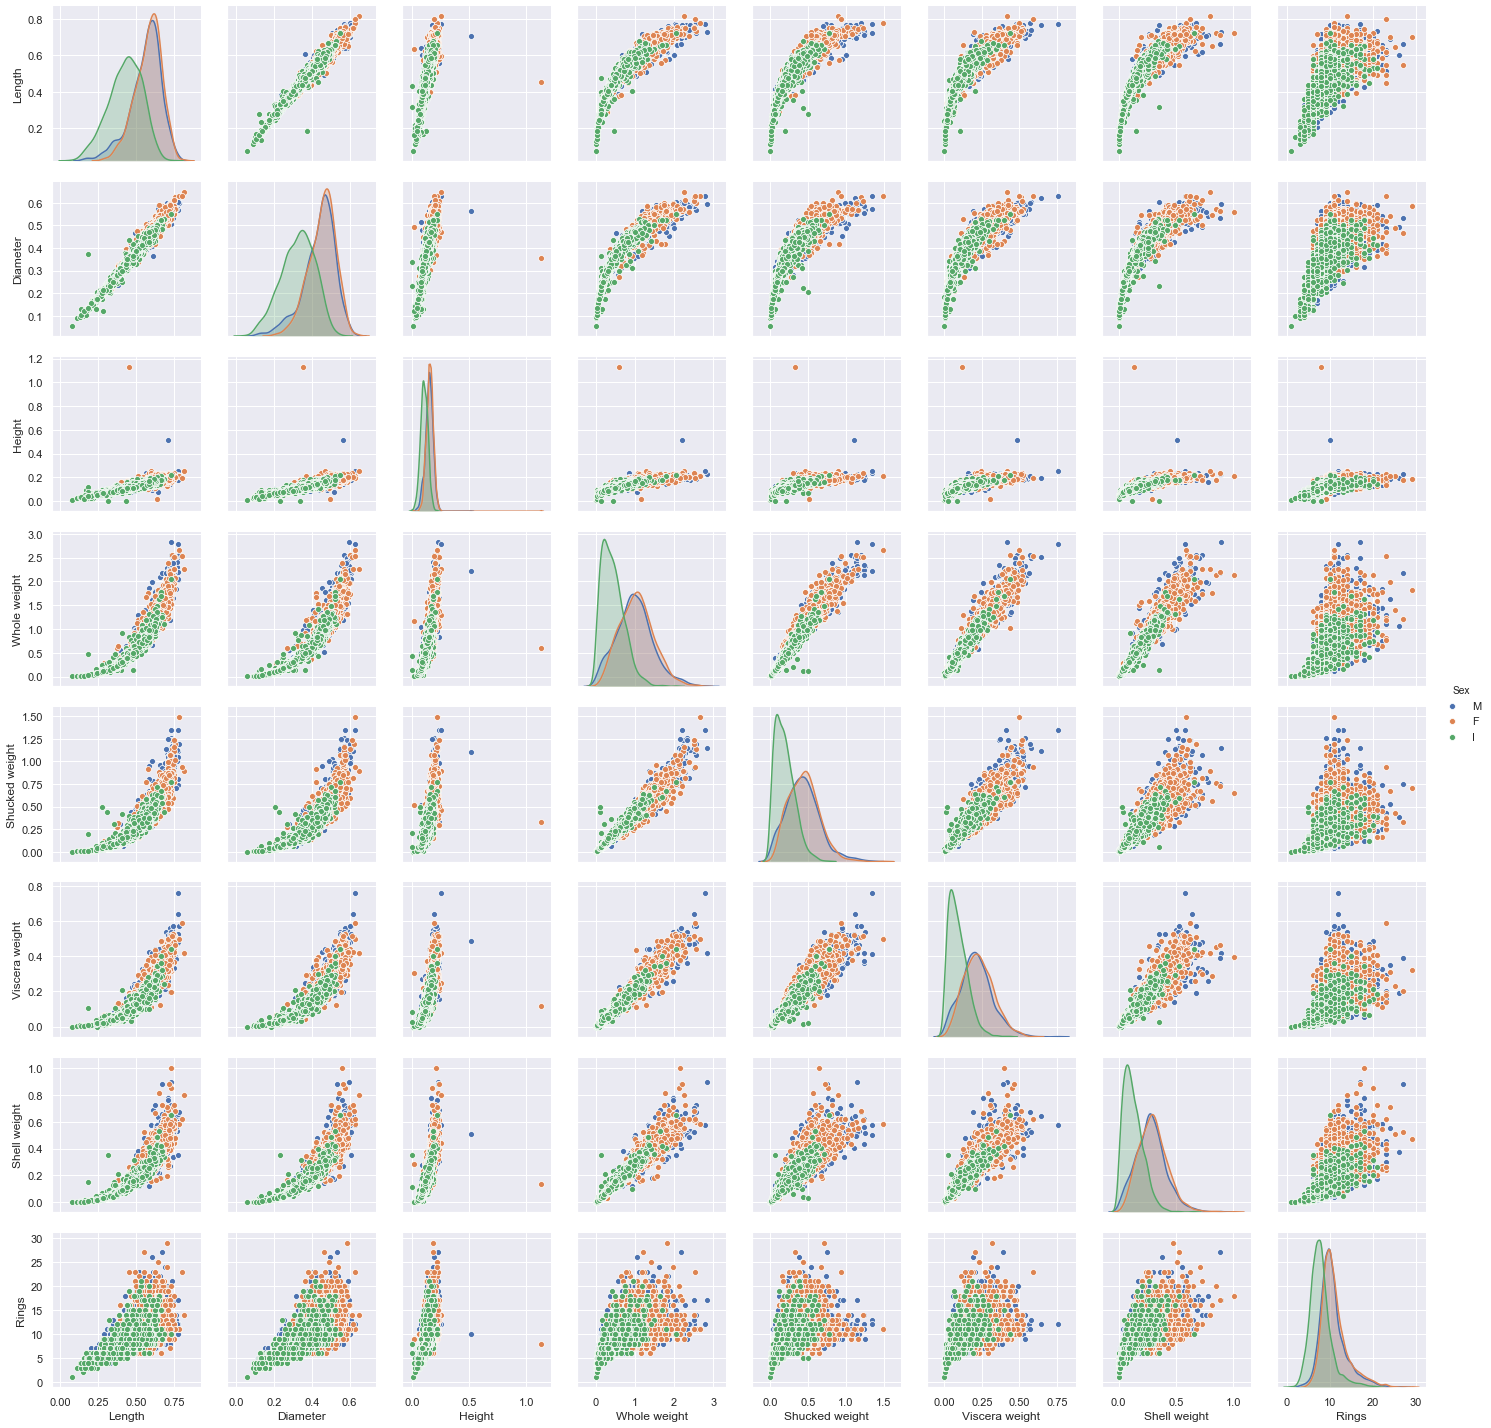

In [11]:
sns.pairplot(dataset, hue='Sex')

# Classifier

In [12]:
# Encoding categorical data
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
#Avoiding the dummy varible trap
X = X[:, 1:]

c:\users\vivek mittal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\vivek mittal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
#classifier
mlp = MLPClassifier(hidden_layer_sizes=(16), max_iter = 1000, solver = "adam", learning_rate ='constant')

In [16]:
kfold = KFold(n_splits=5,random_state=0)
cv_results = cross_val_score(mlp, X_train, y_train, cv = kfold, scoring = 'accuracy')

In [17]:
info = "%s: %f (%f)" % ("MLP", cv_results.mean(), cv_results.std())
print(info)

MLP: 0.278658 (0.012000)


In [18]:
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
print("Accuracy of MLP Classifier:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy of MLP Classifier: 0.27751196172248804

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.21      0.36      0.27        11
           5       0.26      0.15      0.19        33
           6       0.39      0.45      0.42        47
           7       0.41      0.38      0.39        98
           8       0.41      0.44      0.42       113
           9       0.29      0.39      0.33       127
          10       0.21      0.40      0.27       107
          11       0.20      0.15      0.17        95
          12       0.13      0.03      0.05        66
          13       0.10      0.13      0.11        39
          14       0.50      0.04      0.07        26
          15       0.00      0.00      0.00        18
          16       0.08      0.07      0.07        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
        

c:\users\vivek mittal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
